# Imports

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.preprocessing import LabelEncoder
from sklearn import set_config
set_config(transform_output='pandas')
pd.set_option('display.max_colwidth', 250)

from imblearn.under_sampling import RandomUnderSampler
from tensorflow.keras import layers, optimizers, regularizers
from tensorflow.keras.layers import TextVectorization
from tensorflow.keras.models import Sequential

tf.keras.utils.set_random_seed(42)
tf.random.set_seed(42)
np.random.seed(42)
# Run the Enable Deterministic Operations Function
tf.config.experimental.enable_op_determinism()

# Load the data using joblib

In [2]:
import joblib
df=joblib.load('Data-NLP/Movies-reviews-processed.joblib')
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2419 entries, 1 to 8647
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   review_id       2419 non-null   object 
 1   movie_id        2419 non-null   int64  
 2   imdb_id         2419 non-null   object 
 3   original_title  2419 non-null   object 
 4   review          2419 non-null   object 
 5   rating          2419 non-null   float64
 6   group           2419 non-null   object 
 7   cln_review      2419 non-null   object 
 8   tokens          2419 non-null   object 
 9   lemmas          2419 non-null   object 
 10  tokens-joined   2419 non-null   object 
 11  lemmas-joined   2419 non-null   object 
dtypes: float64(1), int64(1), object(10)
memory usage: 245.7+ KB


,review_id,movie_id,imdb_id,original_title,review,rating,group,cln_review,tokens,lemmas,tokens-joined,lemmas-joined
1,57086ff5c3a3681d29001512,7443,tt0120630,Chicken Run,"A guilty pleasure for me personally, as I love both 'The Great Escape' and most of the works I have seen, over the years, from this rightfully-esteemed British animation company. Highly recommended both for children and for adults who enjoy anima...",9.0,high_rating,"A guilty pleasure for me personally, as I love both 'The Great Escape' and most of the works I have seen, over the years, from this rightfully-esteemed British animation company. Highly recommended both for children and for adults who enjoy anima...","[guilty, pleasure, personally, love, great, escape, works, seen, years, rightfully, esteemed, british, animation, company, highly, recommended, children, adults, enjoy, animation]","[guilty, pleasure, personally, love, great, escape, works, seen, years, rightfully, esteemed, british, animation, company, highly, recommended, children, adults, enjoy, animation]",guilty pleasure personally love great escape works seen years rightfully esteemed british animation company highly recommended children adults enjoy animation,guilty pleasure personally love great escape works seen years rightfully esteemed british animation company highly recommended children adults enjoy animation
6,57b2d23dc3a36837d7000b14,955,tt0120755,Mission: Impossible II,"The first underwhelmed me, but this one straight-up bored me. Again, of course seeing Hunt climb a mountain without a harness is impressive sure. And I even quite liked the idea behind the villain of the piece (though even that angle was woefully...",3.0,low_rating,"The first underwhelmed me, but this one straight-up bored me. Again, of course seeing Hunt climb a mountain without a harness is impressive sure. And I even quite liked the idea behind the villain of the piece (though even that angle was woefully...","[underwhelmed, straight, bored, course, seeing, hunt, climb, mountain, harness, impressive, sure, liked, idea, villain, piece, angle, woefully, underdeveloped, setting, predominantly, australia, grab, attention, saying, cause, pretty, biased, com...","[underwhelmed, straight, bored, course, seeing, hunt, climb, mountain, harness, impressive, sure, liked, idea, villain, piece, angle, woefully, underdeveloped, setting, predominantly, australia, grab, attention, saying, cause, pretty, biased, com...",underwhelmed straight bored course seeing hunt climb mountain harness impressive sure liked idea villain piece angle woefully underdeveloped setting predominantly australia grab attention saying cause pretty biased comes hear tell mission impossi...,underwhelmed straight bored course seeing hunt climb mountain harness impressive sure liked idea villain piece angle woefully underdeveloped setting predominantly australia grab attention saying cause pretty biased comes hear tell mission impossi...
7,5e9120963679a10018375490,955,tt0120755,Mission: Impossible II,After quite entertainign Mission Impossible I the second installment turned out ... terrible. As if the screenwriters didn't know how to fill the 2 hrs with action the overuse of heroic slow motion scenes is horrible. You almost might need a barf...,2.0,low_rating,After quite entertainign Mission Impossible I the second installment turned out ... terrible. As if the screenwriters didn't know how to fill the 2 hrs with action the overuse of heroic slow motion scenes is horrible. You almost might need a barf...,"[entertainign, mission, impossible, second, installment, turned, terrible, screenwriters, know, fill, 2, hrs, action, overuse, heroic, slow, motion, scenes, horrible, need, barf, bag, stand, slo, mo, seconds, 15, seconds, amazed, decide, push, m,...","[entertainign, mission, impossible, second, installment, turned, terrible, screenwriters, know, fill, 2, hrs, action, overuse, heroic, slow, motion, scenes, horrible, need, barf, bag, stand, slo, mo, seconds, 

# Checking for if value are between 0-4 and 9-10

In [3]:
df['rating'].value_counts(dropna=False)

9.0     616
10.0    564
4.0     514
1.0     284
3.0     254
2.0     153
9.5      15
0.5      10
3.5       4
1.5       3
2.5       2
Name: rating, dtype: int64

# TTS
- using LabelEncoder to change string target to numerical values

In [4]:
X = df['review']
y_string = df['group']

encoder = LabelEncoder()
y = pd.Series(encoder.fit_transform(y_string))
X_train_full,X_test,y_train_full,y_test=train_test_split(X,y,random_state=42)

In [5]:
classes = y_train_full.unique()
classes

array([1, 0])

# RandomUnderSampler to normalize data set

In [6]:
sampler = RandomUnderSampler(random_state=42)
X_train,y_train= sampler.fit_resample(X_train_full.values.reshape(-1,1),y_train_full)
y_train.value_counts()

0    888
1    888
dtype: int64

In [7]:
X_train.shape

(1776, 1)

In [8]:
X_train = X_train.flatten()
X_train.shape

(1776,)

# Custom Functions

In [9]:
# Adding folder above to python path 
import sys, os
sys.path.append( os.path.abspath("../"))

In [10]:
%load_ext autoreload 
%autoreload 2

import Custom_functions as fn

In [11]:
dir(fn)

['ConfusionMatrixDisplay',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__spec__',
 'build_bow_model',
 'classification_metrics',
 'classification_report',
 'convert_y_to_sklearn_classes',
 'evaluate_classification',
 'evaluate_classification_network',
 'get_true_pred_labels',
 'layers',
 'make_custom_nlp',
 'make_text_vectorization_layer',
 'np',
 'optimizers',
 'pd',
 'plot_history',
 'plt',
 'pprint',
 'regularizers',
 'tf']

# Sklearn Vectorizer
- Using Count
- Stopwords
- ngrams
- max = .6

In [12]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
vectorizer = CountVectorizer(stop_words='english', ngram_range=(1,2))
X_vect = vectorizer.fit_transform(X)
X_max6 = pd.DataFrame(X_vect.toarray(), columns=vectorizer.get_feature_names_out())
X_max6

,00,00 marks,00 robert,00 status,00 today,000,000 000,000 _final,000 abrams,000 amazing,...,λm gяөөƭ,하하,𝐾𝑒𝑒𝑝𝑖𝑛,𝐾𝑒𝑒𝑝𝑖𝑛 𝑠𝑒𝑐𝑟𝑒𝑡𝑠,𝑎𝑟𝑒,𝑎𝑟𝑒 𝑦𝑒,𝑠𝑒𝑐𝑟𝑒𝑡𝑠,𝑠𝑒𝑐𝑟𝑒𝑡𝑠 𝑎𝑟𝑒,𝑦𝑒,𝑦𝑒 time
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2414,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2415,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2416,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2417,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# RandomForestClassifier

----------------------------------------------------------------------
 Classification Metrics: Training Data
----------------------------------------------------------------------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       888
           1       1.00      1.00      1.00       888

    accuracy                           1.00      1776
   macro avg       1.00      1.00      1.00      1776
weighted avg       1.00      1.00      1.00      1776



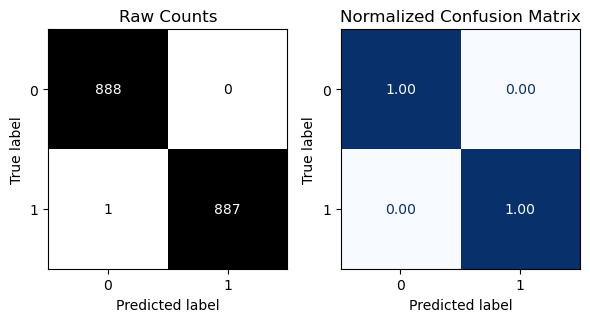


----------------------------------------------------------------------
 Classification Metrics: Test Data
----------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.78      0.93      0.85       307
           1       0.91      0.72      0.81       298

    accuracy                           0.83       605
   macro avg       0.84      0.83      0.83       605
weighted avg       0.84      0.83      0.83       605



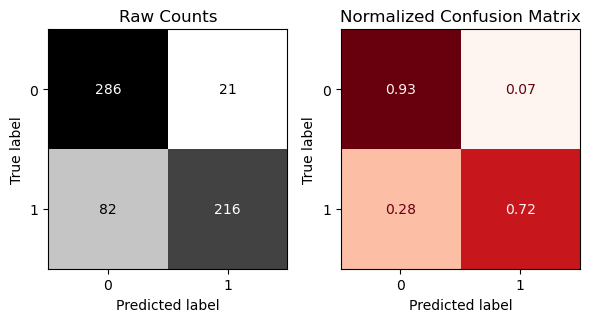

In [13]:
from sklearn.ensemble import RandomForestClassifier
rf_pipe = Pipeline([('vectorizer', vectorizer), ('randomforest', RandomForestClassifier())])

rf_pipe.fit(X_train,y_train)
fn.evaluate_classification(rf_pipe,X_train,y_train,X_test,y_test)

In [15]:
rf=RandomForestClassifier()
vect_pipe = Pipeline([('vectorizer', CountVectorizer()),('random',RandomForestClassifier(random_state=42))])

param_grid = {"Vectorizer": [CountVectorizer(), TfidfVectorizer()]}

param_grid_shared = {
            'vectorizer__stop_words':[None,'english'],
            'vectorizer__max_df':[.5,.6],
            'vectorizer__ngram_range':[(1,2)]
}

param_count = {
            'vectorizer':[CountVectorizer()],
            **param_grid_shared
}

param_tfidf = {
            'vectorizer':[TfidfVectorizer()],
            'vectorizer__norm':['l1','l2'],
            'vectorizer__use_idf':[True,False],
            **param_grid_shared
}

params_combined = [param_count,param_tfidf]

In [16]:
print(params_combined)

[{'vectorizer': [CountVectorizer()], 'vectorizer__stop_words': [None, 'english'], 'vectorizer__max_df': [0.5, 0.6], 'vectorizer__ngram_range': [(1, 2)]}, {'vectorizer': [TfidfVectorizer()], 'vectorizer__norm': ['l1', 'l2'], 'vectorizer__use_idf': [True, False], 'vectorizer__stop_words': [None, 'english'], 'vectorizer__max_df': [0.5, 0.6], 'vectorizer__ngram_range': [(1, 2)]}]


In [17]:
%%time

grid_search = GridSearchCV(vect_pipe, params_combined,cv=3,verbose=1,n_jobs=-1,
                          scoring = 'accuracy')

grid_search.fit(X_train,y_train)

Fitting 3 folds for each of 20 candidates, totalling 60 fits
CPU times: user 2.48 s, sys: 262 ms, total: 2.74 s
Wall time: 27.8 s


GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('vectorizer', CountVectorizer()),
                                       ('random',
                                        RandomForestClassifier(random_state=42))]),
             n_jobs=-1,
             param_grid=[{'vectorizer': [CountVectorizer()],
                          'vectorizer__max_df': [0.5, 0.6],
                          'vectorizer__ngram_range': [(1, 2)],
                          'vectorizer__stop_words': [None, 'english']},
                         {'vectorizer': [TfidfVectorizer(max_df=0.6,
                                                         ngram_range=(1, 2),
                                                         stop_words='english',
                                                         use_idf=False)],
                          'vectorizer__max_df': [0.5, 0.6],
                          'vectorizer__ngram_range': [(1, 2)],
                          'vectorizer__norm': ['l1', 'l2'],
                          'vectorizer__stop_words': [None, 'english'],
                          'vectorizer__use_idf': [True, False]}],
             scoring='accuracy', verbose=1)

In [18]:
grid_search.best_params_

{'vectorizer': TfidfVectorizer(max_df=0.6, ngram_range=(1, 2), stop_words='english',
                 use_idf=False),
 'vectorizer__max_df': 0.6,
 'vectorizer__ngram_range': (1, 2),
 'vectorizer__norm': 'l2',
 'vectorizer__stop_words': 'english',
 'vectorizer__use_idf': False}

----------------------------------------------------------------------
 Classification Metrics: Training Data
----------------------------------------------------------------------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       888
           1       1.00      1.00      1.00       888

    accuracy                           1.00      1776
   macro avg       1.00      1.00      1.00      1776
weighted avg       1.00      1.00      1.00      1776



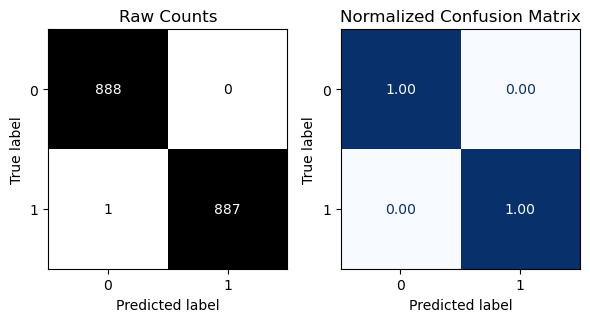


----------------------------------------------------------------------
 Classification Metrics: Test Data
----------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.79      0.90      0.84       307
           1       0.88      0.76      0.81       298

    accuracy                           0.83       605
   macro avg       0.84      0.83      0.83       605
weighted avg       0.84      0.83      0.83       605



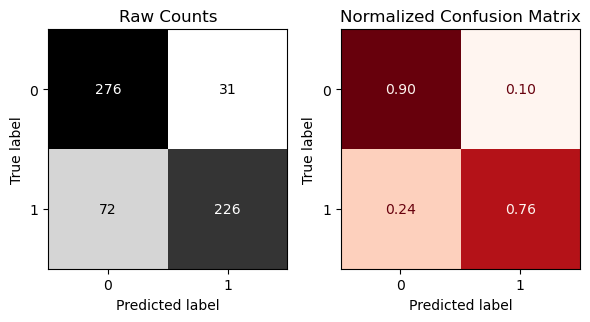

In [19]:
best_rf_model = grid_search.best_estimator_

fn.evaluate_classification(best_rf_model,X_train,y_train,X_test,y_test)

# Convert to Dataset object
- Convert X and y inot a dataset object and apply a shuffling to enusre they are randomly ordered

In [20]:
# Convert to Dataset Object
ds = tf.data.Dataset.from_tensor_slices((X,y))

# Shuffle dateset
df = ds.shuffle(buffer_size = len(ds),reshuffle_each_iteration=False)

Metal device set to: Apple M1


# Train, Validation and Test Split

In [21]:
# Set the ratio of the train, validation, test split
split_train = .7
split_val = .2
split_test = 1-(split_train + split_val)

# Calculate the number of samples for training and validation data
n_train_samples = int(len(ds) * split_train)
n_val_samples = int(len(ds) * split_val)
n_test_samples = len(ds) - (n_train_samples + n_val_samples)

# Set the batch size
BATCH_SIZE = 32
import math

# math.ceil will round up 
# How many Batches?
n_train_batches = math.ceil(n_train_samples/BATCH_SIZE)
n_val_batches = math.ceil(n_val_samples/BATCH_SIZE)
n_test_batches = math.ceil(n_test_samples/BATCH_SIZE)
print(f'  - train:\t{n_train_samples} samples \t({n_train_batches} batches)')
print(f'  - val:  \t{n_val_samples} samples \t({n_val_batches} batches)')
print(f"  - test: \t{n_test_samples} samples \t({n_test_batches} batches)")

  - train:	1693 samples 	(53 batches)
  - val:  	483 samples 	(16 batches)
  - test: 	243 samples 	(8 batches)


# Take and Skip

In [22]:
# Use take and skip to define each set
train_ds = ds.take(n_train_samples).batch(batch_size=BATCH_SIZE)
# Skip over the training batches and take the validation batches
val_ds = ds.skip(n_train_samples).take(n_val_samples).batch(batch_size=BATCH_SIZE)
# Skip over the train and validation batches, the remaining are the test batches
test_ds = ds.skip(n_train_samples + n_val_samples).batch(batch_size=BATCH_SIZE)

In [23]:
# Confirm the number of batches in each
print(f' There are {len(train_ds)} training batches.')
print(f" There are {len(val_ds)} validation batches.")
print(f" There are {len(test_ds)} test batches.")

 There are 53 training batches.
 There are 16 validation batches.
 There are 8 test batches.


# Sequences

In [24]:
# Define sequence length and output dimension(EMBED_DIF) as a variable for the future use
SEQUENCE_LENGTH = 300
EMBED_DIM = 100
# Define vectorizer layer.  Use the custom function to build and fit the vectorizer befor using it in model
sequence_vectorizer, vocat_lookup = fn.make_text_vectorization_layer(train_ds,output_mode='int',
                                                                   output_sequence_length = SEQUENCE_LENGTH,
                                                                   verbose = True)


tf.keras.layers.TextVectorization(
{   'batch_input_shape': (None,),
    'dtype': 'string',
    'encoding': 'utf-8',
    'idf_weights': None,
    'max_tokens': None,
    'name': 'text_vectorization',
    'ngrams': None,
    'output_mode': 'int',
    'output_sequence_length': 300,
    'pad_to_max_tokens': False,
    'ragged': False,
    'sparse': False,
    'split': 'whitespace',
    'standardize': 'lower_and_strip_punctuation',
    'trainable': True,
    'vocabulary': None,
    'vocabulary_size': 24749}
)


2024-01-17 18:05:28.223307: W tensorflow/tsl/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


In [25]:
VOCAB_SIZE = sequence_vectorizer.vocabulary_size()
VOCAB_SIZE

24749

In [26]:
def build_gru_model(text_vectorization_layer):

    gru_model = Sequential([text_vectorization_layer, tf.keras.layers.Embedding(input_dim=VOCAB_SIZE,
                                                                               output_dim=EMBED_DIM,
                                                                               input_length=SEQUENCE_LENGTH)])
    # Add GRU layer 'new'
    gru_model.add(layers.GRU(128, return_sequences = True))
    gru_model.add(layers.Dropout(.5))
    gru_model.add(layers.GRU(64, return_sequences=True))
    gru_model.add(layers.GlobalMaxPooling1D())
    # Output layer
    gru_model.add(layers.Dense(len(classes), activation = 'sigmoid'))

    # Define optimizer
    optimizer = optimizers.legacy.Adam()

    # Compile 
    gru_model.compile(optimizer = optimizer, loss = 'sparse_categorical_crossentropy',
                     metrics = ['accuracy'])
    gru_model.summary()
    return gru_model

In [27]:
def get_callbacks(patience=3, monitor='val_accuracy'):
    early_stop = tf.keras.callbacks.EarlyStopping(patience=patience, monitor=monitor)
    return [early_stop]

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 text_vectorization (TextVec  (None, 300)              0         
 torization)                                                     
                                                                 
 embedding (Embedding)       (None, 300, 100)          2474900   
                                                                 
 gru (GRU)                   (None, 300, 128)          88320     
                                                                 
 dropout (Dropout)           (None, 300, 128)          0         
                                                                 
 gru_1 (GRU)                 (None, 300, 64)           37248     
                                                                 
 global_max_pooling1d (Globa  (None, 64)               0         
 lMaxPooling1D)                                         

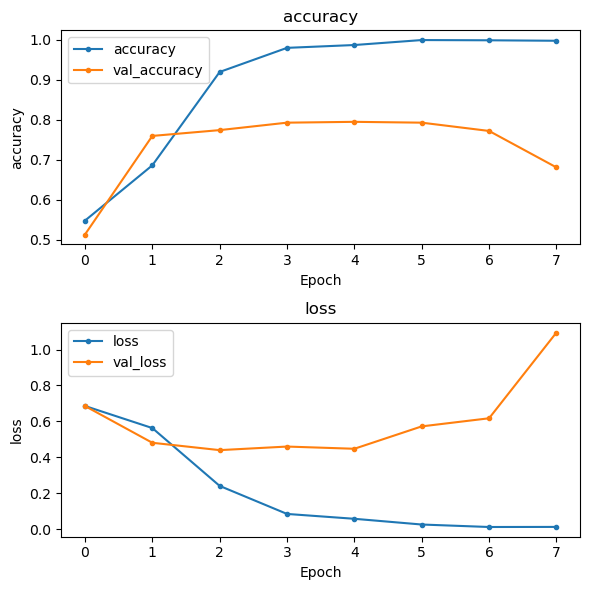


- Evaluating Network...
----------------------------------------------------------------------
 Classification Metrics: Training Data
----------------------------------------------------------------------
              precision    recall  f1-score   support

           0       1.00      0.93      0.96       853
           1       0.93      1.00      0.96       840

    accuracy                           0.96      1693
   macro avg       0.97      0.96      0.96      1693
weighted avg       0.97      0.96      0.96      1693



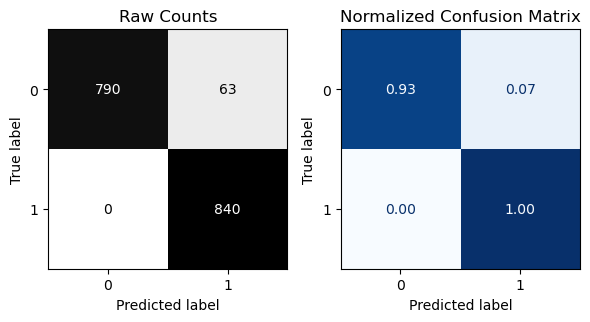


- Evaluating Training Data:
53/53 [==============================] - 1s 18ms/step - loss: 0.1022 - accuracy: 0.9628
{'loss': 0.10223276913166046, 'accuracy': 0.962787926197052}
----------------------------------------------------------------------
 Classification Metrics: Test Data
----------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.82      0.35      0.49       107
           1       0.65      0.94      0.77       136

    accuracy                           0.68       243
   macro avg       0.73      0.64      0.63       243
weighted avg       0.72      0.68      0.64       243



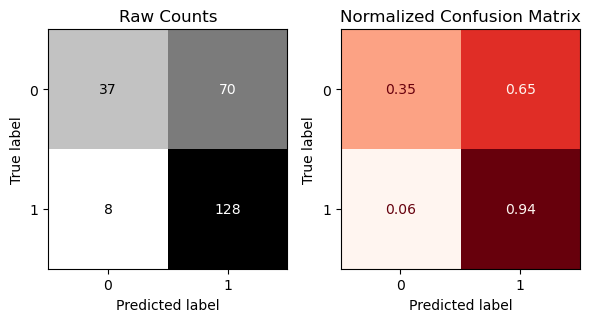


- Evaluating Test Data:
8/8 [==============================] - 0s 23ms/step - loss: 1.2066 - accuracy: 0.6790
{'loss': 1.2066466808319092, 'accuracy': 0.6790123581886292}


In [28]:
# Build the model
model = build_gru_model(sequence_vectorizer)

# Fit the model
EPOCHS = 30
history = model.fit(train_ds,epochs=EPOCHS,validation_data=val_ds,callbacks=get_callbacks())

# Evaluate the model
results = fn.evaluate_classification_network(model,X_train=train_ds, X_test=test_ds,history=history);